# Heart Attack Prediction


This notebook aims to make predictions on whether a person will have heart attack or not.

# Dataset Info <span id='di'/>

`age` - Age of the patient

`sex` - Sex of the patient (1 = male; 0 = female)

`cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

`trtbps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

`thalachh` - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`caa` - Number of major vessels

`thall` - Thalium Stress Test result ~ (0,3)

`exng` - Exercise induced angina ~ 1 = Yes, 0 = No

`output` - Target variable

## Importing Libraries <span id='il'/>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as ss

Libraries are imported


## Setting Params <span id='sp'/>

In [18]:
%matplotlib inline
warnings.filterwarnings("ignore")
sns.set_palette('deep')
sns.set_color_codes()
sns.set_style('dark')

print('Parameters are set')

Parameters are set


## Loading Data <span id='ld'/>

In [19]:
df = pd.read_csv('/home/hala/heart.csv')

# Preliminary Analysis <span id='pa'/>

## Shape of the dataset <span id='sotd'/>

In [20]:
print(f'Shape of the Dataset is: {df.shape}')

Shape of the Dataset is: (303, 14)


## Preview of the dataset <span id='pwotd'/>

In [21]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Missing Values <span id='mv'/>

In [22]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Categorical and Continous <span id='cac'/>

In [8]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'thall', 'caa', 'slp']
continous = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
print('Categorical Variables are:', ', '.join(categorical))
print('Continous Variables are:', ', '.join(continous))

Categorical Variables are: sex, cp, fbs, restecg, exng, thall, caa, slp
Continous Variables are: age, trtbps, chol, thalachh, oldpeak


## General Stats <span id='gs'/>

In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis <span id='eda'/>

### Voilin plot for continous variables <span id='vpfcv'/>

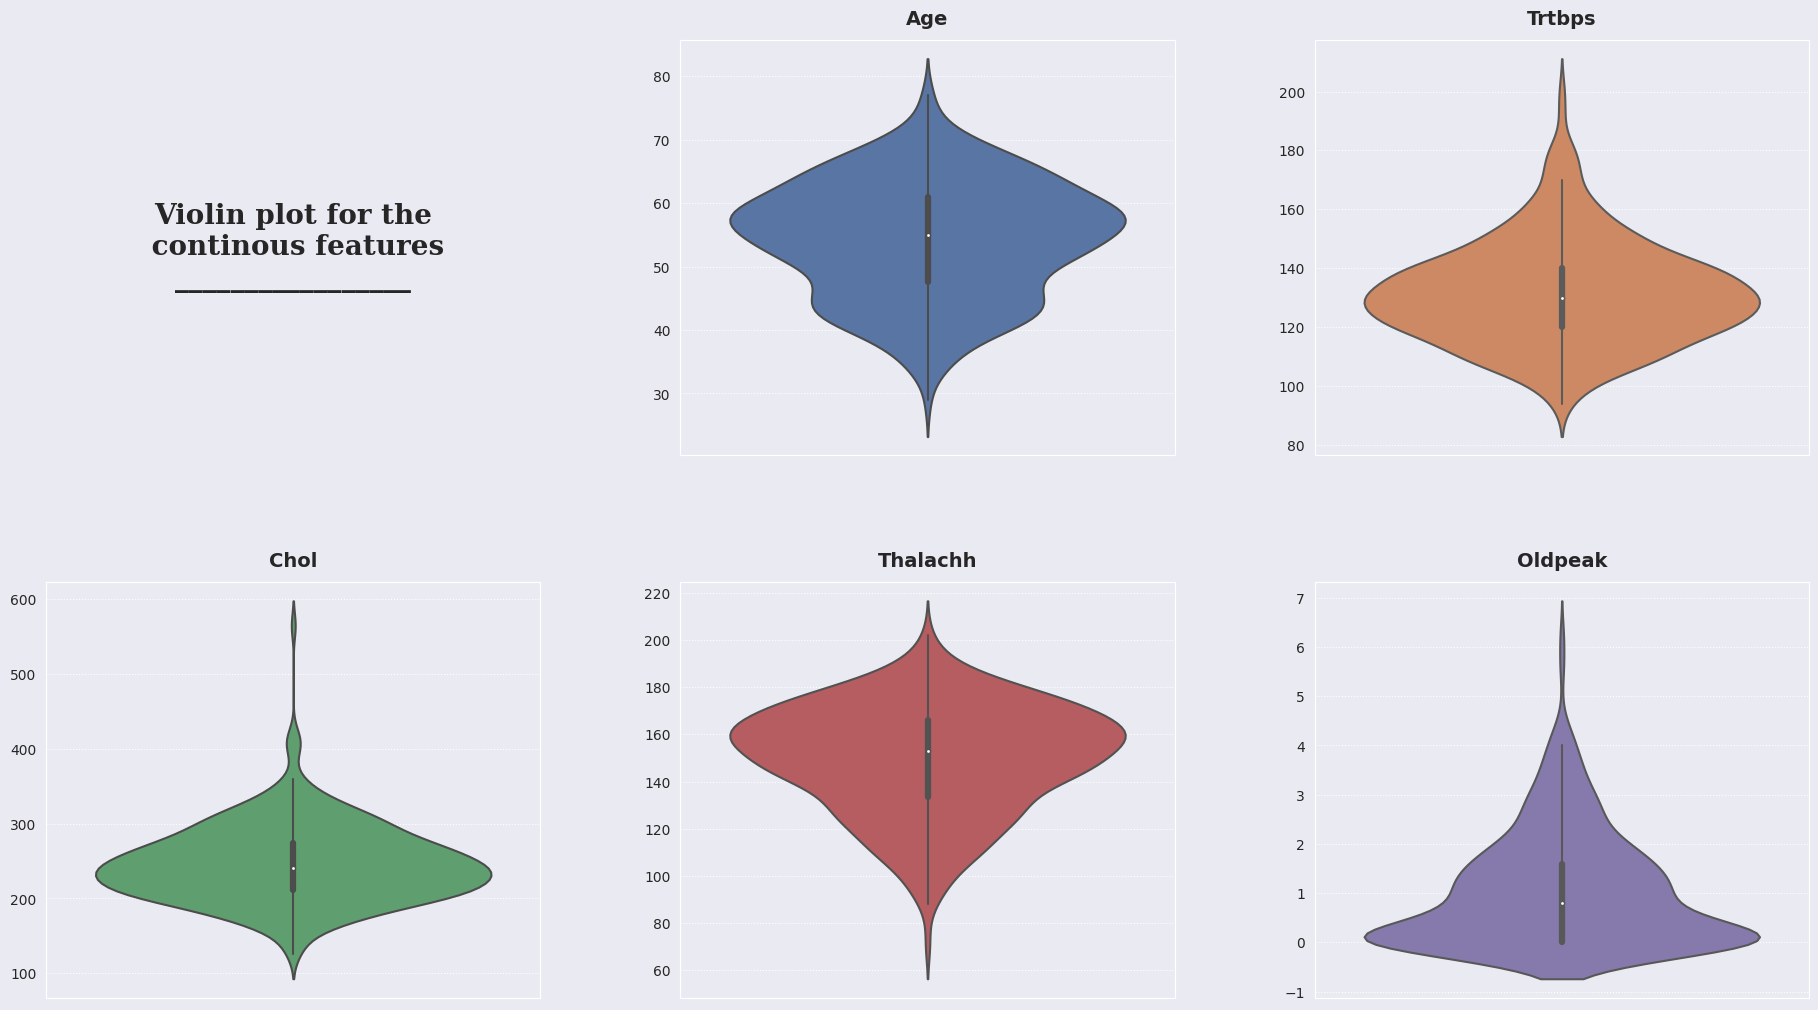

In [23]:
chart_count = len(continous) + 1

fig = plt.figure(figsize=(20, 17))
axes = [fig.add_subplot(3, 3, i) for i in range(1, chart_count + 1)]
fig.tight_layout(pad=7)
fig.patch.set_facecolor('#eaeaf2')

axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Violin plot for the\n continous features\n_________________',
             horizontalalignment='center', verticalalignment='center',
             fontsize=20, fontweight='bold', fontfamily='serif')

for i in range(1, chart_count):
    var = continous[i - 1]
    ax = axes[i]
    ax.grid(axis='y', linestyle=':')
    ax.text(0.5, 1.05, var.title(),
            horizontalalignment='center', verticalalignment='center',
            fontsize=14, fontweight='bold', transform=ax.transAxes)
    color = sns.color_palette('deep')[i - 1]
    sns.violinplot(data=df, y=var, ax=ax, color=color)
    ax.set_xlabel('')
    ax.set_ylabel('')

#### Conclusion

* `chol`, `trtbps`, and `oldpeak` have *decent amount of outliers* that could affect certain models sensitive to them.

* `oldpeak` and `chol` (moderately) are *not uniformly distributed*. This could affect models or analysis with uniform distribution as requirement. 

### Count plot for categorical features <span id='cpfcf'/>

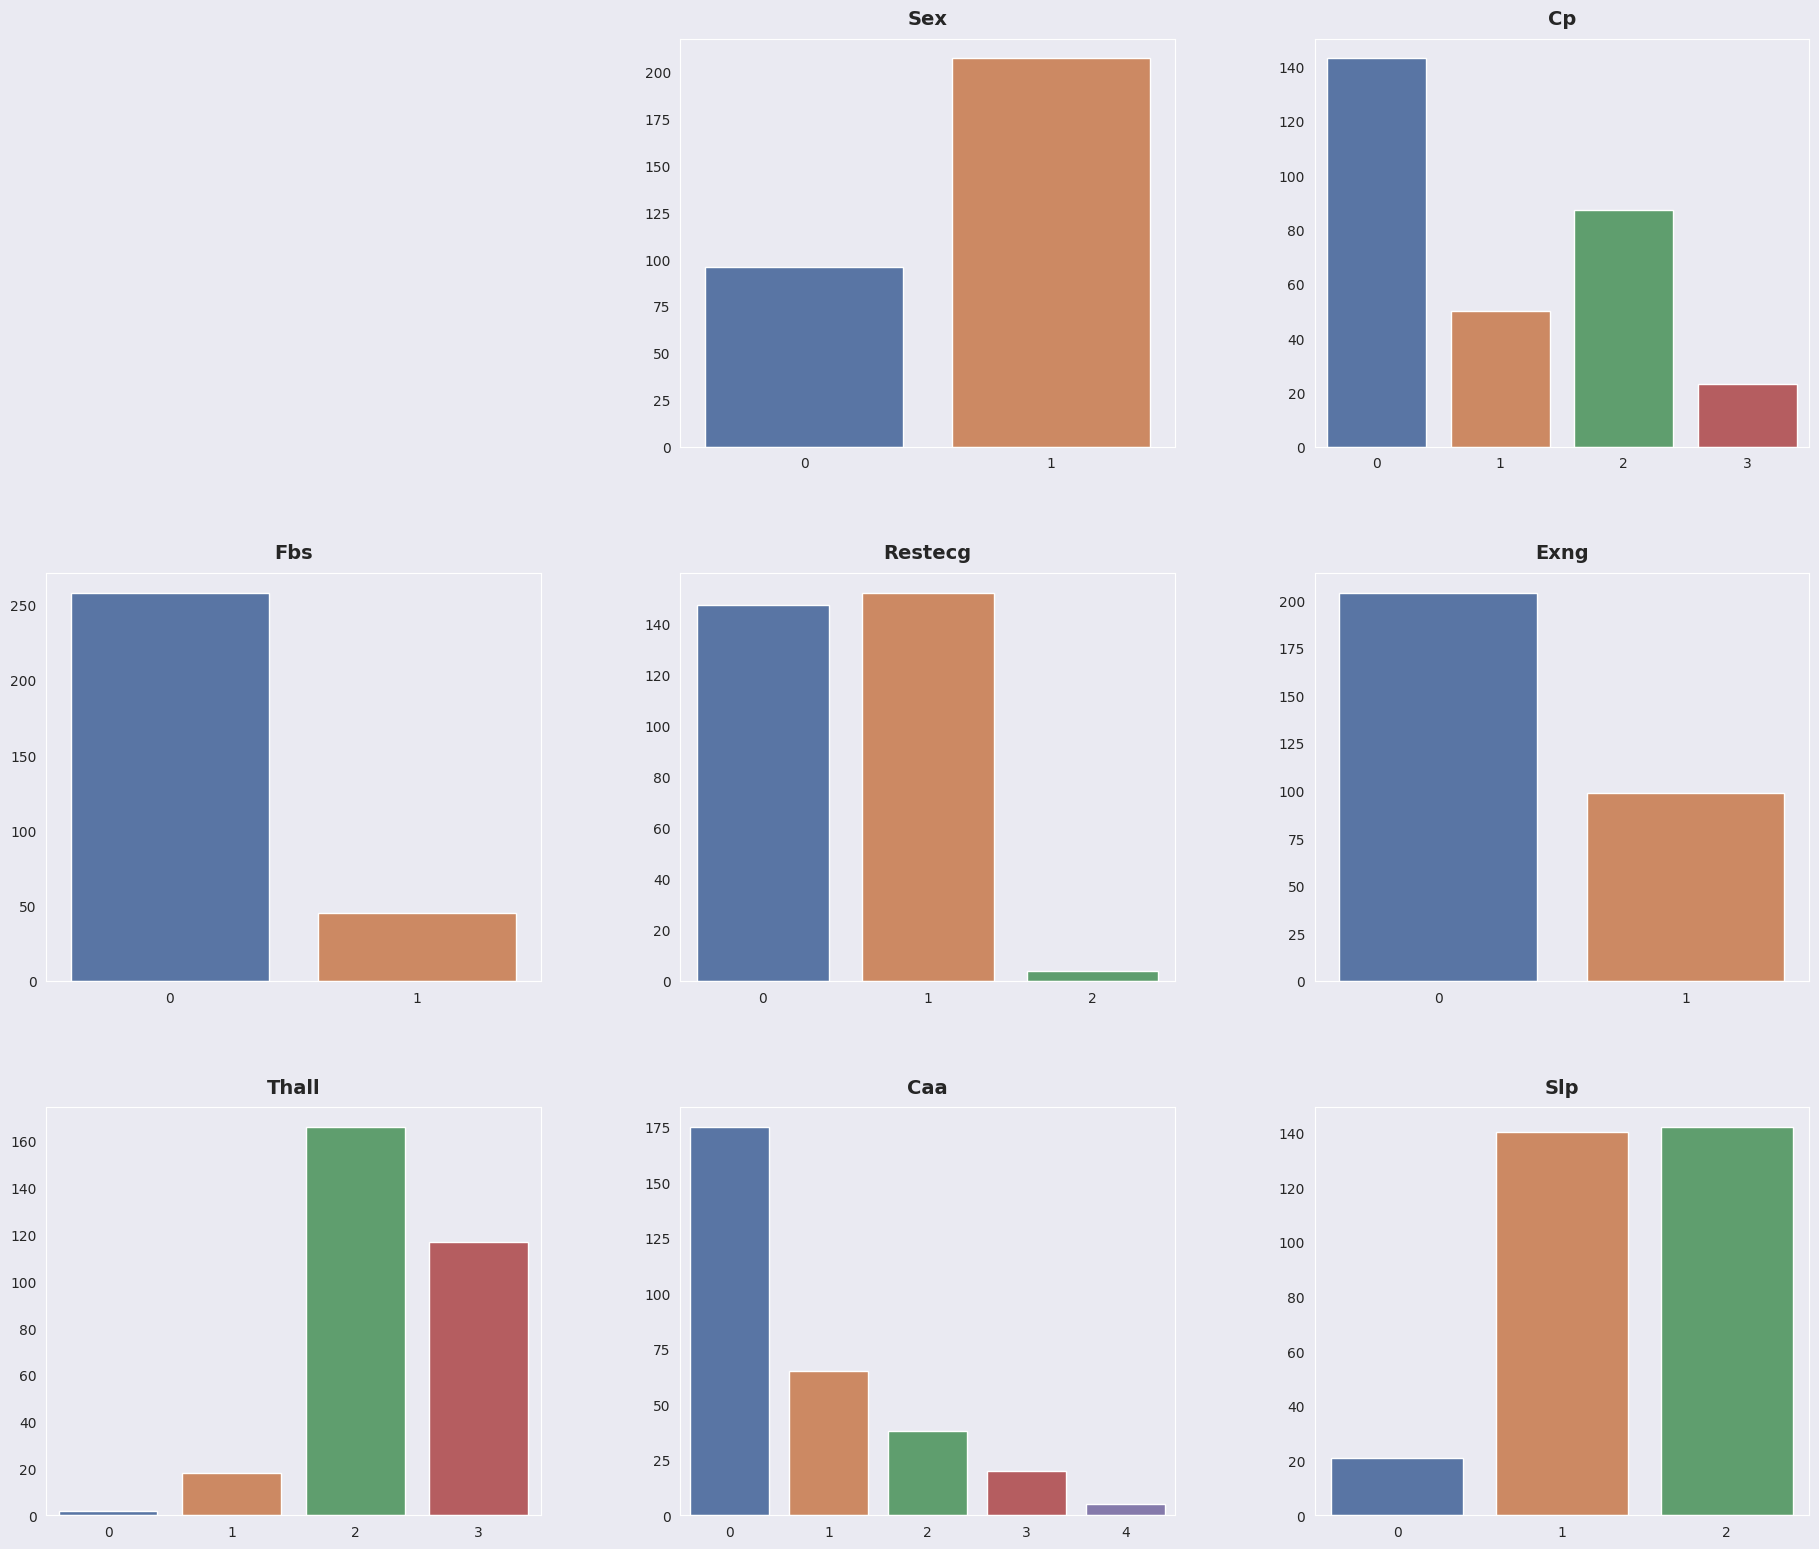

In [24]:
#Count plot for the\n categorical features\n_________________'

chart_count = len(categorical) + 1

fig = plt.figure(figsize=(20, 17))
axes = [fig.add_subplot(3, 3, i) for i in range(1, chart_count + 1)]
fig.tight_layout(pad=7)
fig.patch.set_facecolor('#eaeaf2')

axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             ' ',
             horizontalalignment='center', verticalalignment='center',
             fontsize=20, fontweight='bold', fontfamily='serif')

for i in range(1, chart_count):
    var = categorical[i - 1]
    ax = axes[i]
    ax.text(0.5, 1.05, var.title(),
            horizontalalignment='center', verticalalignment='center',
            fontsize=14, fontweight='bold', transform=ax.transAxes)
    sns.countplot(data=df, x=var, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')

#### Conclusion

* `Restecg`, `Thall`, `Caa`, `Slp` are *likely to impact few models sensitive to data distribution* because value counts for some values is extremely low. 

* `Fbs` and `Cp` could *possibly affect models sensitive to data distribution* because their value counts is also not ideal. 

In [ ]:
#SVM

In [26]:
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)


The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


In [28]:
# Support Vector Machines

# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))



The test accuracy score of SVM is  0.8688524590163934


The best params are : {'C': 2, 'gamma': 0.01}
The best score is   : 0.8346938775510205
The test accuracy score of SVM after hyper-parameter tuning is  0.9344262295081968
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61

[[28  1]
 [ 3 29]]


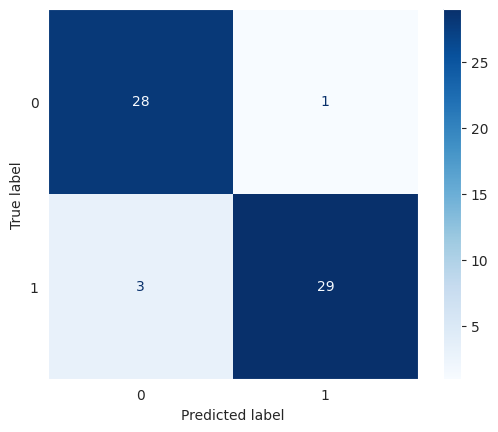

In [51]:
from sklearn.model_selection import GridSearchCV
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(searcher, X_test, y_test,cmap=plt.cm.Blues) 


In [35]:
print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))


Confusion Matrix :
[[26  3]
 [ 3 29]]


In [33]:
  print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



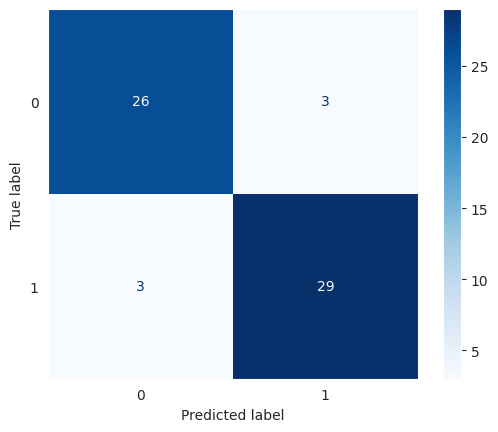

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(searcher, X_test, y_test,cmap=plt.cm.Blues) 

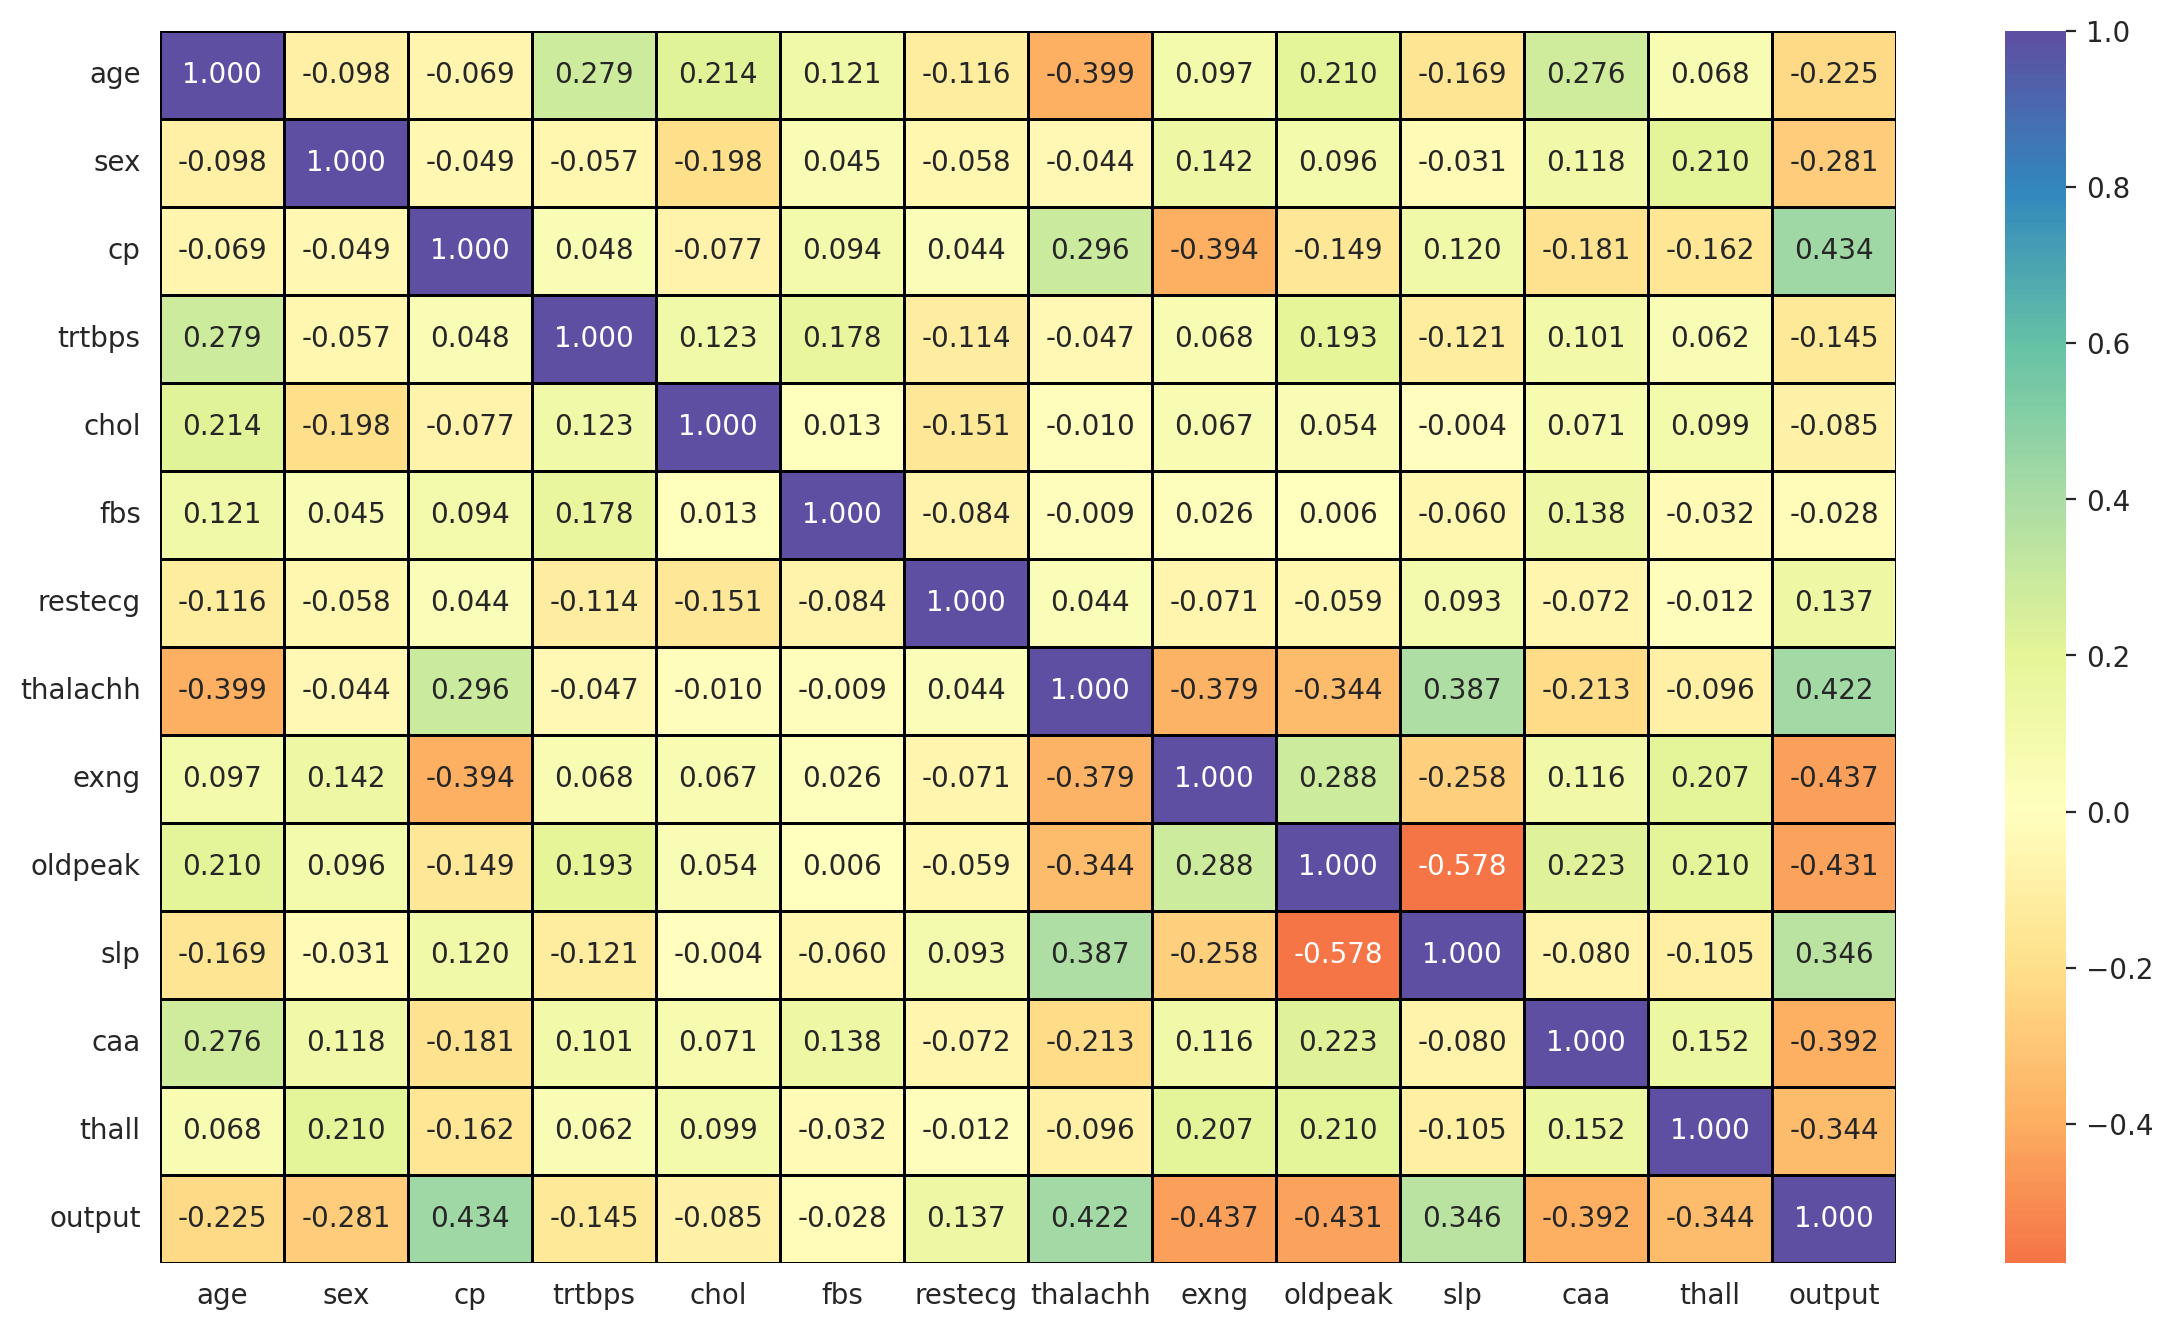

In [39]:
plt.figure(figsize=(14,8),dpi=200)
sns.heatmap(df.corr(),cmap='Spectral'  ,annot=True,linecolor='black',linewidths=1,fmt=".3f",center=0);

### Plots for continous variables w.r.t output <span id='pfcvwo'>

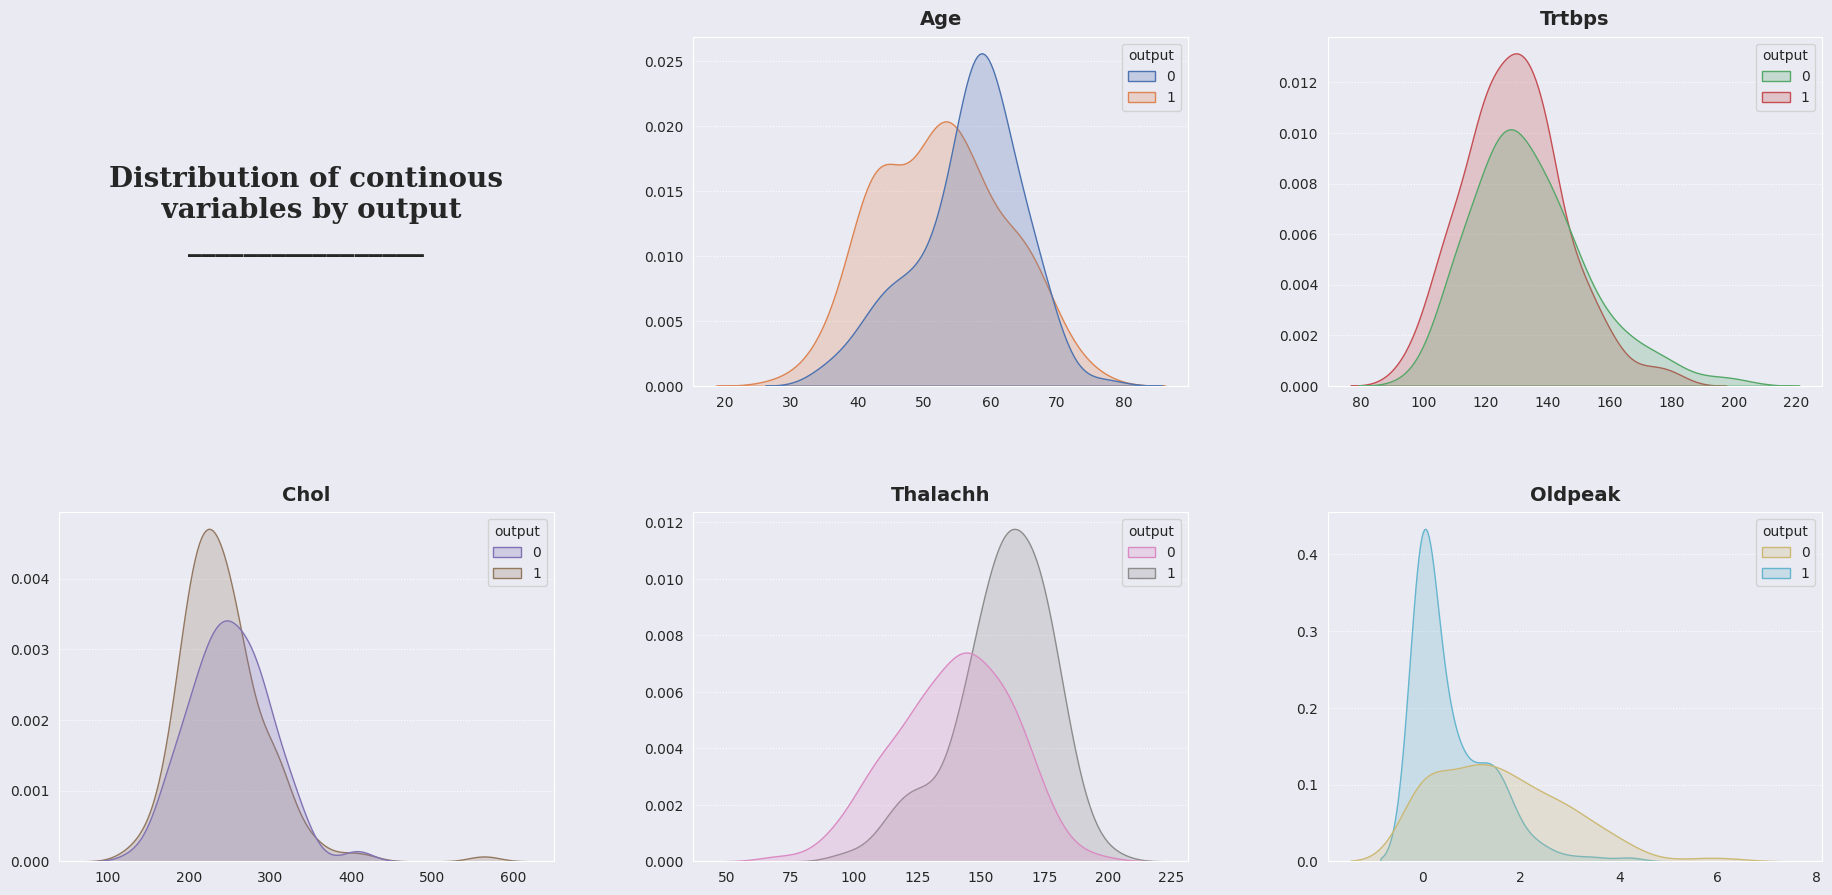

In [40]:
chart_count = len(continous) + 1

fig = plt.figure(figsize=(20, 15))
axes = [fig.add_subplot(3, 3, i) for i in range(1, chart_count + 1)]
fig.tight_layout(pad=7)
fig.patch.set_facecolor('#eaeaf2')

axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Distribution of continous\n variables by output\n_________________',
             horizontalalignment='center', verticalalignment='center',
             fontsize=20, fontweight='bold', fontfamily='serif')

for i in range(1, chart_count):
    var = continous[i - 1]
    ax = axes[i]
    ax.grid(axis='y', linestyle=':')
    ax.text(0.5, 1.05, var.title(),
            horizontalalignment='center', verticalalignment='center',
            fontsize=14, fontweight='bold', transform=ax.transAxes)
    colorIndex = (2*(i - 1)) % 10
    color1 = sns.color_palette('deep')[colorIndex]
    color2 = sns.color_palette('deep')[colorIndex + 1]
    sns.kdeplot(data=df, x=var, hue='output', ax=ax, fill=True,
                palette=[color1, color2])
    ax.set_xlabel('')
    ax.set_ylabel('')

#### Conclusion

* `Trtbps` and `Chol` are not likely to have correlation
* `Age` and `Thalachh` might have weak correlation
* `Oldpeak` is likely to be correlated. 

## Conclusion <span id='edac'/>


**Relation to target variable**

* All categorical variables *except* `Fbs` are related to output, albeit to varying degrees. Especially, `Restecg` and `sex` have very weak relation.

* All continous variables are related to output 

**Multi-collinearity**
* Variables do *not have strong correlation* and are *weakly correlated*

# Model Development <span id='md'/>

## Loading Libraries <span id='ll'/>

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

print('Libraries are Loaded')

Libraries are Loaded


## Feature Engineering <span id='fe'/>

We would get out X as the values we determined to have an impact, Standardize them, and get One-hot encoding for categorical variables.

In [42]:
X = df[['sex', 'restecg', 'cp', 'exng', 'thall', 'caa', 'slp', 'age',
        'trtbps', 'chol', 'thalachh', 'oldpeak']]
y = df['output']

scaler = StandardScaler()
X[continous] = scaler.fit_transform(X[continous])

encode_columns = categorical.copy()
encode_columns.remove('fbs')

X = pd.get_dummies(X, columns=encode_columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=65)

print('Done Pre-processing')
print('Final No. of features: ', X.shape[1])

Done Pre-processing
Final No. of features:  28


## Training Models and Getting Results <span id='tmagr'/>

---------------------------------------------------
 Logistic Regression 
---------------------------------------------------
Accuracy: 0.96721
Precision: 1.0
Recall: 0.9375
F1: 0.96774


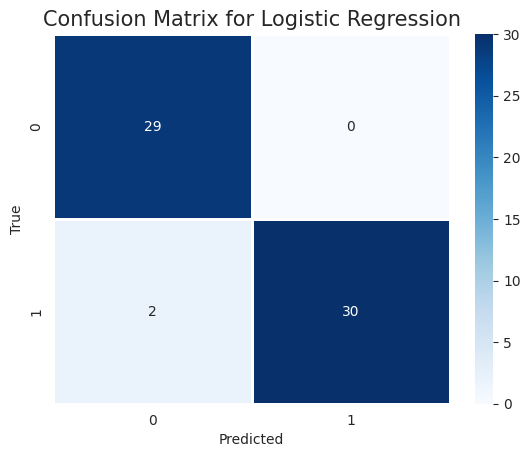

---------------------------------------------------
 K-Nearest Neighbors 
---------------------------------------------------
Accuracy: 0.90164
Precision: 0.90625
Recall: 0.90625
F1: 0.90625


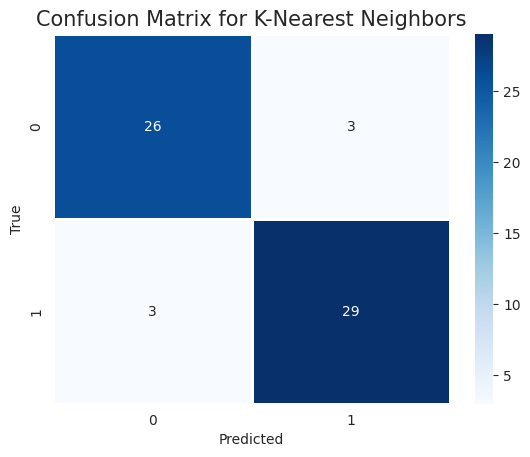

---------------------------------------------------
 SVM 
---------------------------------------------------
Accuracy: 0.91803
Precision: 0.90909
Recall: 0.9375
F1: 0.92308


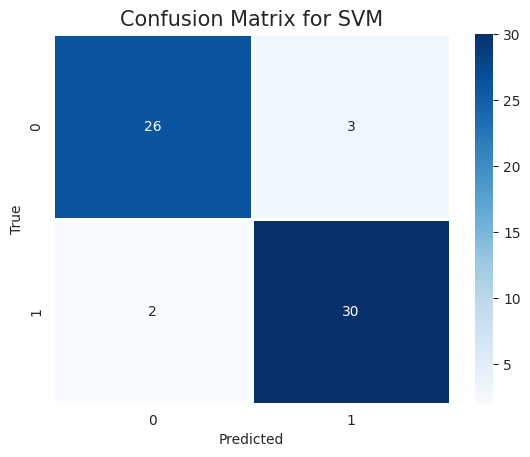

---------------------------------------------------
 Decision Tree 
---------------------------------------------------
Accuracy: 0.90164
Precision: 0.93333
Recall: 0.875
F1: 0.90323


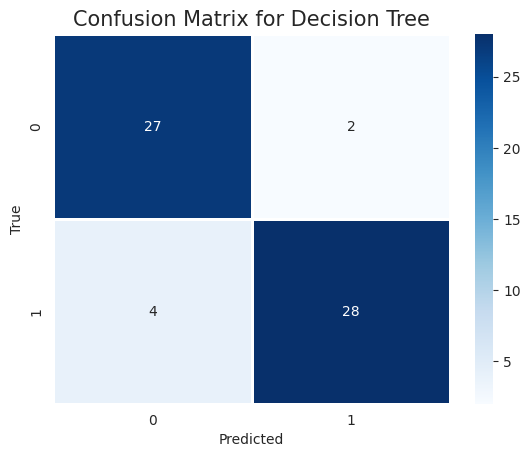

---------------------------------------------------
 Random Forest 
---------------------------------------------------
Accuracy: 0.91803
Precision: 0.96552
Recall: 0.875
F1: 0.91803


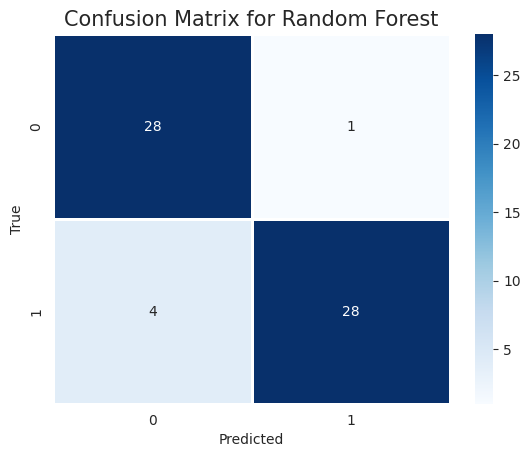

---------------------------------------------------
 Gradient Boosting 
---------------------------------------------------
Accuracy: 0.90164
Precision: 0.88235
Recall: 0.9375
F1: 0.90909


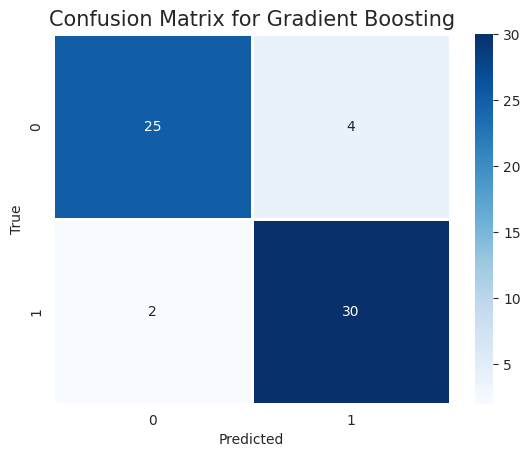

---------------------------------------------------
 AdaBoost Classifier 
---------------------------------------------------
Accuracy: 0.95082
Precision: 0.96774
Recall: 0.9375
F1: 0.95238


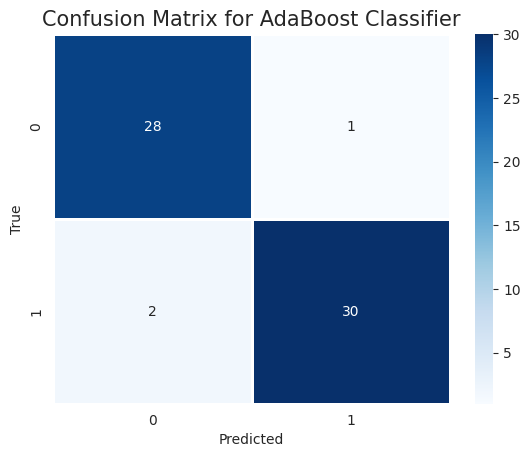

In [45]:
models = {'Logistic Regression': LogisticRegression(),
          'K-Nearest Neighbors': KNeighborsClassifier(),
          'SVM': SVC(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),       
          'Gradient Boosting': GradientBoostingClassifier(),
          'AdaBoost Classifier': AdaBoostClassifier(learning_rate=0.15, n_estimators=25),
         }

accuracy_dict, precision_dict, recall_dict, f1_dict = dict(), dict(), dict(), dict()

for name, model in models.items():
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    print('---------------------------------------------------\n',
          name,
          '\n---------------------------------------------------')

    acc = accuracy_score(y_test, y_hat)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_hat, average='binary')
    acc, precision, recall, f1 = round(acc, 5), round(precision, 5), round(recall, 5), round(f1, 5)
    
    accuracy_dict[name] = acc
    precision_dict[name] = precision
    recall_dict[name] = recall
    f1_dict[name] = f1

    print(f'Accuracy: {acc}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}')

    cm = confusion_matrix(y_test, y_hat)
    df_cm = pd.DataFrame(cm)
    sns.heatmap(df_cm, annot=True, cmap='Blues', linewidths=2)
    plt.title(f'Confusion Matrix for {name}', fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

## Plot of Scores <span id='pos'/>

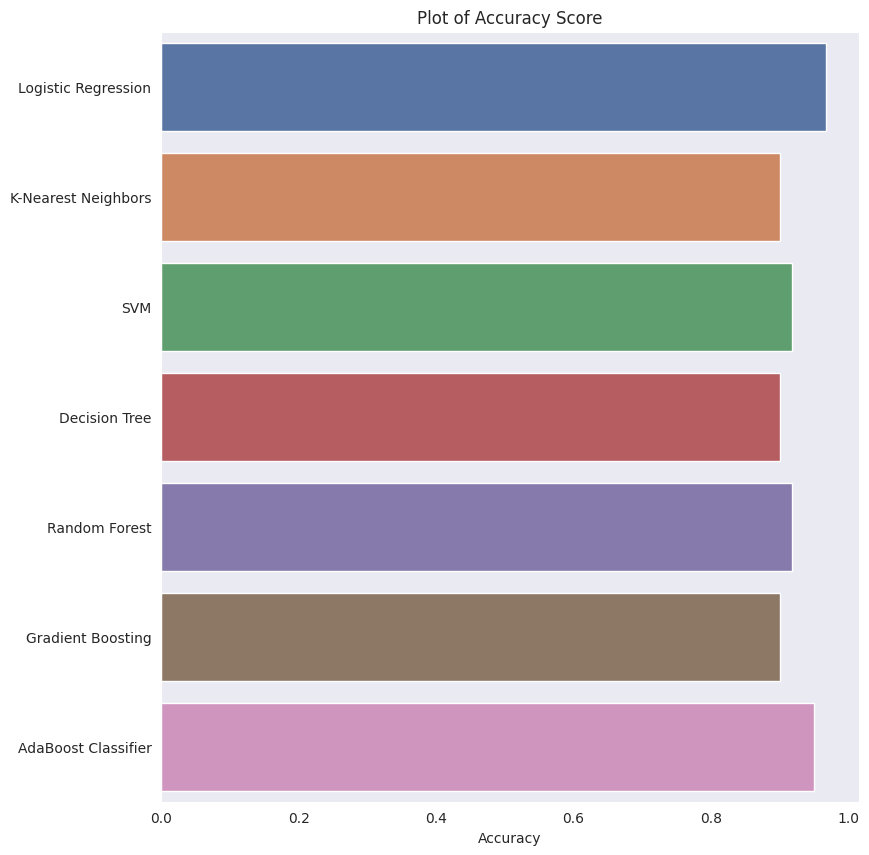

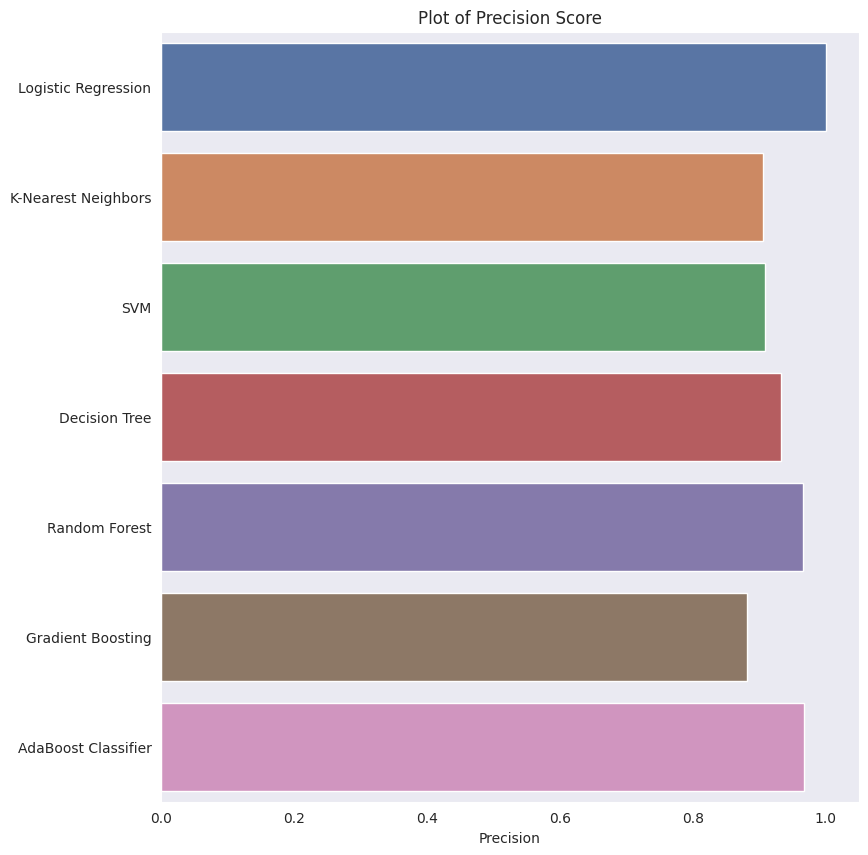

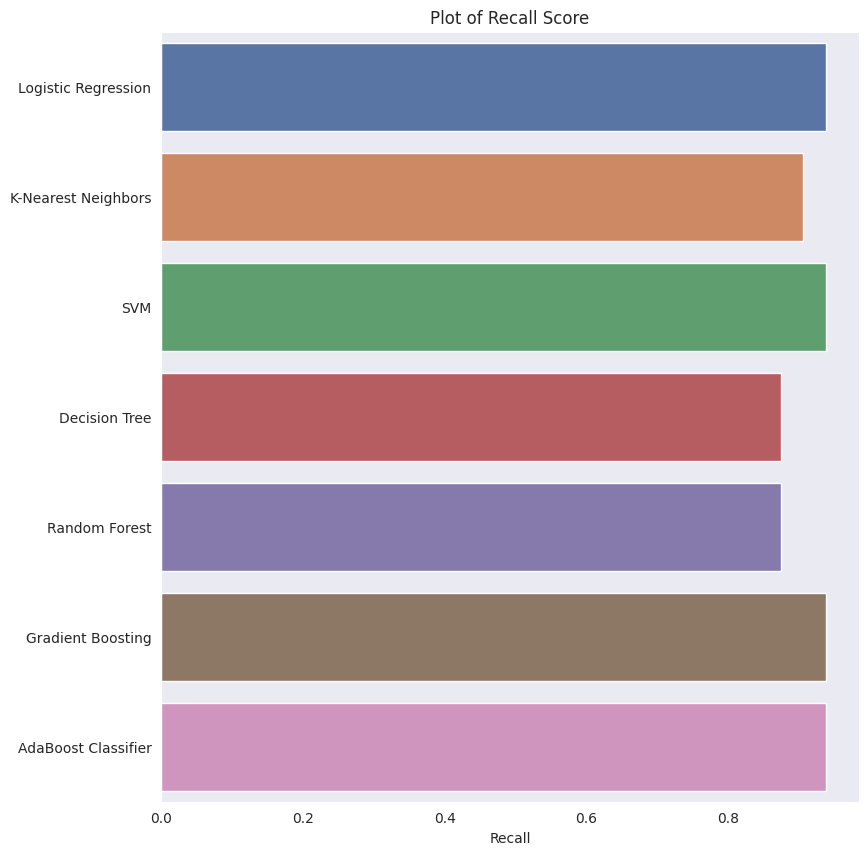

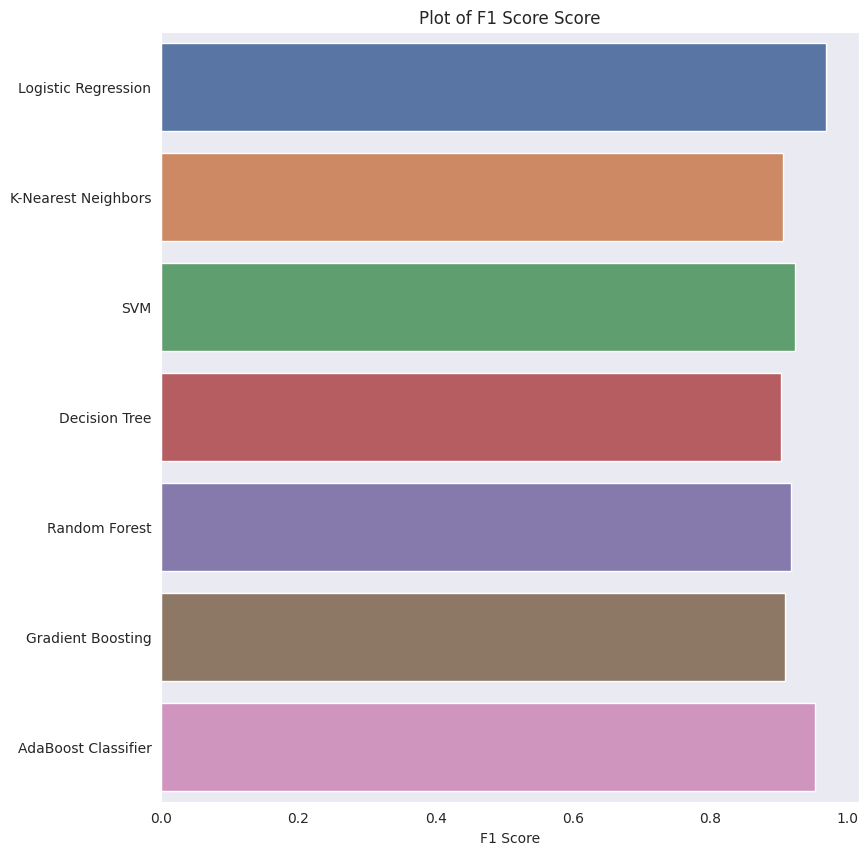

In [46]:
scores_dicts = {
                'Accuracy': accuracy_dict,
                'Precision': precision_dict,
                'Recall': recall_dict,
                'F1 Score': f1_dict,
              }

for name, scores_dict in scores_dicts.items():
    index, values = zip(*scores_dict.items())
    acc_df = pd.DataFrame(data=values, index=index, columns=[name])
    plt.figure(figsize=(9, 10))
    sns.barplot(y=acc_df.index, x=acc_df[name])
    plt.title(f'Plot of {name} Score')


# The best ones were Ensemble Methods (Gradient Boost, AdaBoost) and Logistic Regression